# The Battle of Neighborhoods - NewYork

### Importing Necessary Libraries

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium --yes
import folium

print('Libraries Imported!')

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         112 KB

The following NEW packages will be INSTALLED:

    branca:  0.3.1-py_0  conda-forge
    folium:  0.10.1-py_0 conda-forge
    vincent: 0.4.4-py_1  conda-forge


branca-0.3.1         | 25 KB     | ##################################### | 100% 
folium-0.10.1        | 59 KB     | #####

In [3]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


### Dealing with json data to obtain the Dataframe

In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [6]:
NY_neighborhoods_data = newyork_data['features']

In [7]:
NY_neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [8]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude']

NY_neighborhoods = pd.DataFrame(columns = column_names)

In [9]:
NY_neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [10]:
for data in NY_neighborhoods_data:
    borough = data['properties']['borough']
    neighborhood_name = data['properties']['name']
    
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_neighborhoods = NY_neighborhoods.append({'Borough': borough,
                                               'Neighborhood': neighborhood_name,
                                               'Latitude': neighborhood_lat,
                                               'Longitude': neighborhood_lon}, ignore_index = True)

In [11]:
NY_neighborhoods.head()
NY_neighborhoods.to_excel(r'D:\ML\IBM Applied Data Science Capstone Project\NY_data.xlsx', index = None, header=True, encoding = 'utf8-8')

In [12]:
print('The Dataframe has {} boroughs and {} neighborhoods.'.format(
        len(NY_neighborhoods['Borough'].unique()),
        NY_neighborhoods.shape[0]
))

The Dataframe has 5 boroughs and 306 neighborhoods.


In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'ny_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of New York City are {} {}.'.format(latitude, longitude))

The geographical coordinate of New York City are 40.7127281 -74.0060152.


In [14]:
map_newyork = folium.Map(location = [latitude, longitude], zoom_start = 10)

for lat, lng, borough, neighborhood in zip(NY_neighborhoods['Latitude'], NY_neighborhoods['Longitude'], NY_neighborhoods['Borough'], NY_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_newyork)

map_newyork

In [15]:
CLIENT_ID = 'HTEI3RFH5DTZHU5XWNSE4BIQYPMNB1MDNXPID3O04K303IQV' # your Foursquare ID
CLIENT_SECRET = 'SUYEQBXTGB4QKND0IYAWYMQUXDR451LPGQQAR1PEWATXQQC5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HTEI3RFH5DTZHU5XWNSE4BIQYPMNB1MDNXPID3O04K303IQV
CLIENT_SECRET:SUYEQBXTGB4QKND0IYAWYMQUXDR451LPGQQAR1PEWATXQQC5


In [16]:
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
NY_venues = getNearbyVenues(names = NY_neighborhoods['Neighborhood'], latitudes = NY_neighborhoods['Latitude'], longitudes = NY_neighborhoods['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [18]:
print(NY_venues.shape)
NY_venues.head()

(10246, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
3           Dunkin'       40.890459       -73.849089      Donut Shop  
4             Shell       40.894187       -73.845862     Gas Station

In [19]:
NY_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allerton                                      33                      33   
Annadale                                      11                      11   
Arden Heights                                  6                       6   
Arlington                                      5                       5   
Arrochar                                      24                      24   
Arverne                                       18                      18   
Astoria                                      100                     100   
Astoria Heights                               13                      13   
Auburndale                                    19                      19   
Bath Beach                                    53                      53   
Battery Park City                             95                      95   
Bay Ridge                                     86                      86   
Bay Terrace                                   47                      47   
Baychester                                    23                      23   
Bayside                                       74                      74   
Bayswater                                      3                       3   
Bedford Park                                  37                      37   
Bedford Stuyvesant                            26                      26   
Beechhurst                                    15                      15   
Bellaire                                      10                      10   
Belle Harbor                                  16                      16   
Bellerose                                     20                      20   
Belmont                                      100                     100   
Bensonhurst                                   29                      29   
Bergen Beach                                   8                       8   
Blissville                                    19                      19   
Bloomfield                                     5                       5   
Boerum Hill                                   86                      86   
Borough Park                                  18                      18   
Breezy Point                                   3                       3   
Briarwood                                     13                      13   
Brighton Beach                                45                      45   
Broad Channel                                  5                       5   
Broadway Junction                             13                      13   
Bronxdale                                     14                      14   
Brooklyn Heights                             100                     100   
Brookville                                     1                       1   
Brownsville                                   20                      20   
Bulls Head                                    47                      47   
Bushwick                                      71                      71   
Butler Manor                                   6                       6   
Cambria Heights                               13                      13   
Canarsie                                       8                       8   
Carnegie Hill                                100                     100   
Carroll Gardens                              100                     100   
Castle Hill                                   10                      10   
Castleton Corners                             13                      13   
Central Harlem                                47                      47   
Charleston                                    31                      31   
Chelsea                                      104                     104   
Chinatown                                    100                     100   

In [20]:
print('There are {} unique categories.'.format(len(NY_venues['Venue Category'].unique())))

There are 433 unique categories.


In [21]:
NY_onehot = pd.get_dummies(NY_venues[['Venue Category']], prefix = "", prefix_sep = "")

NY_onehot['Neighborhood'] = NY_venues['Neighborhood']

col_list = list(NY_onehot.columns)
col_list.remove('Neighborhood')
cols = ['Neighborhood'] + [col for col in col_list]

NY_onehot = NY_onehot[cols]

NY_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0    Wakefield                  0               0                  0   
1    Wakefield                  0               0                  0   
2    Wakefield                  0               0                  0   
3    Wakefield                  0               0                  0   
4    Wakefield                  0               0                  0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                   0                    0             0       0   
1                   0                    0             0       0   
2                   0                    0             0       0   
3                   0                    0             0       0   
4                   0                    0             0       0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0                   0           0                      0                    0   
1                   0           0                      0                    0   
2                   0           0                      0                    0   
3                   0           0                      0                    0   
4                   0           0                      0                    0   

   Auto Dealership  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0                0            0                0          0           0   
1                0            0                0          0           0   
2                0            0                0          0           0   
3                0            0                0          0           0   
4                0            0                0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Bath House  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0                 0           0      0          0                0         0   
1                 0           0      0          0                0         0   
2                 0           0      0          0                0         0   
3                 0           0      0          0                0         0   
4                 0           0      0          0                0         0   

   Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0            0           0              0                         0   
1            0           0              0                         0   
2            0           0              0                         0   
3            0           0              0                         0   
4            0           0              0                         0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat or Ferry  Bo

In [22]:
NY_onehot.shape

(10246, 433)

In [23]:
NY_grouped = NY_onehot.groupby('Neighborhood').mean().reset_index()
NY_grouped

Neighborhood  Accessories Store  Adult Boutique  \
0                     Allerton           0.000000            0.00   
1                     Annadale           0.000000            0.00   
2                Arden Heights           0.000000            0.00   
3                    Arlington           0.000000            0.00   
4                     Arrochar           0.000000            0.00   
5                      Arverne           0.000000            0.00   
6                      Astoria           0.000000            0.00   
7              Astoria Heights           0.000000            0.00   
8                   Auburndale           0.000000            0.00   
9                   Bath Beach           0.000000            0.00   
10           Battery Park City           0.000000            0.00   
11                   Bay Ridge           0.000000            0.00   
12                 Bay Terrace           0.021277            0.00   
13                  Baychester           0.000000            0.00   
14                     Bayside           0.000000            0.00   
15                   Bayswater           0.000000            0.00   
16                Bedford Park           0.000000            0.00   
17          Bedford Stuyvesant           0.000000            0.00   
18                  Beechhurst           0.000000            0.00   
19                    Bellaire           0.000000            0.00   
20                Belle Harbor           0.000000            0.00   
21                   Bellerose           0.000000            0.00   
22                     Belmont           0.000000            0.00   
23                 Bensonhurst           0.000000            0.00   
24                Bergen Beach           0.000000            0.00   
25                  Blissville           0.000000            0.00   
26                  Bloomfield           0.000000            0.00   
27                 Boerum Hill           0.000000            0.00   
28                Borough Park           0.000000            0.00   
29                Breezy Point           0.000000            0.00   
30                   Briarwood           0.000000            0.00   
31              Brighton Beach           0.000000            0.00   
32               Broad Channel           0.000000            0.00   
33           Broadway Junction           0.000000            0.00   
34                   Bronxdale           0.000000            0.00   
35            Brooklyn Heights           0.000000            0.00   
36                  Brookville           0.000000            0.00   
37                 Brownsville           0.000000            0.00   
38                  Bulls Head           0.000000            0.00   
39                    Bushwick           0.000000            0.00   
40                Butler Manor           0.000000            0.00   
41             Cambria Heights           0.000000            0.00   
42                    Canarsie           0.000000            0.00   
43               Carnegie Hill           0.000000            0.00   
44             Carroll Gardens           0.000000            0.00   
45                 Castle Hill           0.000000            0.00   
46           Castleton Corners           0.000000            0.00   
47              Central Harlem           0.000000            0.00   
48                  Charleston           0.000000            0.00   
49                     Chelsea           0.000000            0.00   
50                   Chinatown           0.000000            0.00   
51                 City Island           0.000000            0.00   
52                   City Line           0.000000            0.00   
53                Civic Center           0.000000            0.00   
54           Claremont Village           0.000000            0.00   
55                Clason Point           0.000000            0.00   
56                     Clifton           0.000000            0.00   
57              

In [24]:
NY_grouped.shape

(301, 433)

In [25]:
export_excel = NY_grouped.to_excel(r'D:\ML\IBM Applied Data Science Capstone Project\NY_grouped.xlsx', index = None, header=True, encoding = 'utf8-8')

# The Battle of Neighborhood - Toronto

## Using BeautifulSoup library to extract information from Wikipedia


In [26]:
import requests
from bs4 import BeautifulSoup

wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

req = requests.get(wiki_url)
soup = BeautifulSoup(req.content, 'lxml')
table_classes = {"class": ["sortable", "plainrowheaders"]}
wikitables = soup.findAll("table", table_classes)
wikitables

[<table class="wikitable sortable">
 <tbody><tr>
 <th>Postcode</th>
 <th>Borough</th>
 <th>Neighbourhood
 </th></tr>
 <tr>
 <td>M1A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M2A</td>
 <td>Not assigned</td>
 <td>Not assigned
 </td></tr>
 <tr>
 <td>M3A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Parkwoods" title="Parkwoods">Parkwoods</a>
 </td></tr>
 <tr>
 <td>M4A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Victoria_Village" title="Victoria Village">Victoria Village</a>
 </td></tr>
 <tr>
 <td>M5A</td>
 <td><a href="/wiki/Downtown_Toronto" title="Downtown Toronto">Downtown Toronto</a></td>
 <td><a href="/wiki/Regent_Park" title="Regent Park">Harbourfront</a>
 </td></tr>
 <tr>
 <td>M6A</td>
 <td><a href="/wiki/North_York" title="North York">North York</a></td>
 <td><a href="/wiki/Lawrence_Heights" title="Lawrence Heights">Lawrence Heights</a>
 </td></tr>
 <tr>


In [27]:
for table in wikitables:
    ths = table.find_all('th')
    headings = [th.text.strip() for th in ths]
    if headings[:3] == ['Postcode', 'Borough', "Neighbourhood"]:
        break
with open('list_of_postal_codes_of_canada.txt', 'w') as fo:
    for tr in table.find_all('tr'):
        tds = tr.find_all('td')
        if not tds:
            continue
        PostalCode, Borough, Neighborhood = [td.text.strip() for td in tds[:3]]
        
        print('; '.join([PostalCode, Borough, Neighborhood]), file=fo)

In [28]:
df = pd.read_csv('list_of_postal_codes_of_canada.txt', sep = ';', header = None, names = ['PostalCode', 'Borough', 'Neighborhood'])
df.head()

PostalCode            Borough       Neighborhood
0        M1A       Not assigned       Not assigned
1        M2A       Not assigned       Not assigned
2        M3A         North York          Parkwoods
3        M4A         North York   Victoria Village
4        M5A   Downtown Toronto       Harbourfront

In [29]:
import re
booleans = []

for result in df.Borough:
    if not re.search('Not assigned', result):
        booleans.append(True)
    else:
        booleans.append(False)
print(booleans[0:5])
print(len(booleans))

Filtered = pd.Series(booleans)

can_data = df[Filtered].reset_index(drop = True)

can_data.head(5)

[False, False, True, True, True]
287


PostalCode            Borough       Neighborhood
0        M3A         North York          Parkwoods
1        M4A         North York   Victoria Village
2        M5A   Downtown Toronto       Harbourfront
3        M6A         North York   Lawrence Heights
4        M6A         North York     Lawrence Manor

In [30]:
new_cd = can_data.astype(str).groupby('PostalCode')['Neighborhood'].agg(','.join).reset_index()
merged_cd = pd.merge(can_data, new_cd, on = ['PostalCode'], how = 'inner')
duplicate_cd = merged_cd.drop(['Neighborhood_x'], axis = 1)
final_cd = duplicate_cd.drop_duplicates(subset='PostalCode')
final_cd.columns = ['PostalCode', 'Borough', 'Neighborhood']
final_cd = final_cd.reset_index(drop = True)

In [31]:
boolean = []

for result in final_cd.Neighborhood:
    if not re.search('Not assigned', result):
        boolean.append(True)
    else:
        boolean.append(False)



Filter = pd.Series(boolean)

X = final_cd['Neighborhood'].where(boolean, np.nan)
X = pd.Series(X)
final_cd = final_cd.drop(['Neighborhood'], axis = 1)

final_cd['Neighborhood'] = X.values

In [32]:
final_cd["Neighborhood"] = final_cd["Neighborhood"].fillna(final_cd["Borough"])
final_cd.head()

PostalCode            Borough                       Neighborhood
0        M3A         North York                          Parkwoods
1        M4A         North York                   Victoria Village
2        M5A   Downtown Toronto                       Harbourfront
3        M6A         North York   Lawrence Heights, Lawrence Manor
4        M7A   Downtown Toronto                       Queen's Park

In [33]:
final_cd.shape

(103, 3)

In [34]:
path = "http://cocl.us/Geospatial_data"

ll_df = pd.read_csv(path)
ll_df.columns = ['PostalCode', 'Latitude', 'Longitude']
ll_df.head()

PostalCode   Latitude  Longitude
0        M1B  43.806686 -79.194353
1        M1C  43.784535 -79.160497
2        M1E  43.763573 -79.188711
3        M1G  43.770992 -79.216917
4        M1H  43.773136 -79.239476

In [35]:
toronto_data = pd.merge(final_cd, ll_df, on = ['PostalCode'], how = 'inner')
toronto_data.head()

toronto_data.to_excel(r'D:\ML\IBM Applied Data Science Capstone Project\toronto_data.xlsx', index = None, header=True, encoding = 'utf8-8')

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Using Folium to visualize the city of Toronto and it's neighborhoods

In [37]:
address = 'Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.653963, -79.387207.


In [38]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Function to retrieve venues using FourSquare API

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

 Parkwoods
 Victoria Village
 Harbourfront
 Lawrence Heights, Lawrence Manor
 Queen's Park
 Queen's Park
 Rouge, Malvern
 Don Mills North
 Woodbine Gardens, Parkview Hill
 Ryerson, Garden District
 Glencairn
 Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
 Highland Creek, Rouge Hill, Port Union
 Flemingdon Park, Don Mills South
 Woodbine Heights
 St. James Town
 Humewood-Cedarvale
 Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
 Guildwood, Morningside, West Hill
 The Beaches
 Berczy Park
 Caledonia-Fairbanks
 Woburn
 Leaside
 Central Bay Street
 Christie
 Cedarbrae
 Hillcrest Village
 Bathurst Manor, Downsview North, Wilson Heights
 Thorncliffe Park
 Adelaide, King, Richmond
 Dovercourt Village, Dufferin
 Scarborough Village
 Fairview, Henry Farm, Oriole
 Northwood Park, York University
 East Toronto
 Harbourfront East, Toronto Islands, Union Station
 Little Portugal, Trinity
 East Birchmount Park, Ionview, Kennedy Park
 Bayview Village
 CFB Toron

In [41]:
print(toronto_venues.shape)
toronto_venues.head()

(2215, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0          Parkwoods              43.753259              -79.329656   
1          Parkwoods              43.753259              -79.329656   
2          Parkwoods              43.753259              -79.329656   
3          Parkwoods              43.753259              -79.329656   
4   Victoria Village              43.725882              -79.315572   

                               Venue  Venue Latitude  Venue Longitude  \
0                    Brookbanks Park       43.751976       -79.332140   
1                      Variety Store       43.751974       -79.333114   
2         TTC stop - 44 Valley Woods       43.755402       -79.333741   
3  Corrosion Service Company Limited       43.752432       -79.334661   
4             Victoria Village Arena       43.723481       -79.315635   

               Venue Category  
0                        Park  
1           Food & Drink Shop  
2                    Bus Stop  
3  Construction & Landscaping  
4                Hockey Arena

In [42]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
 Adelaide, King, Richmond                                             100   
 Agincourt                                                              4   
 Agincourt North, L'Amoreaux East, Milliken, St...                      2   
 Albion Gardens, Beaumond Heights, Humbergate, ...                     11   
 Alderwood, Long Branch                                                 9   
 Bathurst Manor, Downsview North, Wilson Heights                       20   
 Bayview Village                                                        4   
 Bedford Park, Lawrence Manor East                                     23   
 Berczy Park                                                           56   
 Birch Cliff, Cliffside West                                            4   
 Bloordale Gardens, Eringate, Markland Wood, Ol...                      7   
 Brockton, Exhibition Place, Parkdale Village                          22   
 Business Reply Mail Processing Centre 969 Eastern                     17   
 CFB Toronto, Downsview East                                            5   
 CN Tower, Bathurst Quay, Island airport, Harbo...                     16   
 Cabbagetown, St. James Town                                           46   
 Caledonia-Fairbanks                                                    5   
 Canada Post Gateway Processing Centre                                 11   
 Cedarbrae                                                              8   
 Central Bay Street                                                    86   
 Chinatown, Grange Park, Kensington Market                             85   
 Christie                                                              18   
 Church and Wellesley                                                  84   
 Clairlea, Golden Mile, Oakridge                                       10   
 Clarks Corners, Sullivan, Tam O'Shanter                               13   
 Cliffcrest, Cliffside, Scarborough Village West                        2   
 Commerce Court, Victoria Hotel                                       100   
 Davisville                                                            31   
 Davisville North                                                       7   
 Deer Park, Forest Hill SE, Rathnelly, South Hi...                     14   
 Del Ray, Keelesdale, Mount Dennis, Silverthorn                         6   
 Design Exchange, Toronto Dominion Centre                             100   
 Don Mills North                                                        4   
 Dorset Park, Scarborough Town Centre, Wexford ...                      6   
 Dovercourt Village, Dufferin                                          14   
 Downsview Central                                                      3   
 Downsview Northwest                                                    5   
 Downsview West                                                         5   
 Downsview, North Park, Upwood Park                                     4   
 East Birchmount Park, Ionview, Kennedy Park                            6   
 East Toronto                                                           3   
 Emery, Humberlea                                                       1   
 Fairview, Henry Farm, Oriole                                          62   
 First Canadian Place, Underground city                               100   
 Flemingdon Park, Don Mills South                                      23   
 Forest Hill North, Forest Hill West                                    4   
 Glencairn                                                              4   
 Guildwood, Morningside, West Hill                                      7   
 Harbord, University of Toronto                                        36   
 Harbourfront                                                          48   
 Harbourfront East, Toronto Islands, Union Stati

In [43]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 268 uniques categories.


### One-Hot-Encoding to devise the Feature set


In [44]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
col_list = list(toronto_onehot.columns)
col_list.remove('Neighborhood')
cols = ['Neighborhood'] + [col for col in col_list]

toronto_onehot = toronto_onehot[cols]
toronto_onehot.head()

Neighborhood  Accessories Store  Afghan Restaurant  Airport  \
0          Parkwoods                  0                  0        0   
1          Parkwoods                  0                  0        0   
2          Parkwoods                  0                  0        0   
3          Parkwoods                  0                  0        0   
4   Victoria Village                  0                  0        0   

   Airport Food Court  Airport Lounge  Airport Service  Airport Terminal  \
0                   0               0                0                 0   
1                   0               0                0                 0   
2                   0               0                0                 0   
3                   0               0                0                 0   
4                   0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                    0             0         0            0   
1                    0             0         0            0   
2                    0             0         0            0   
3                    0             0         0            0   
4                    0             0         0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0               0                 0                 0                   0   
1               0                 0                 0                   0   
2               0                 0                 0                   0   
3               0                 0                 0                   0   
4               0                 0                 0                   0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  \
0      0                0         0           0                   0   
1      0                0         0           0                   0   
2      0                0         0           0                   0   
3      0                0         0           0                   0   
4      0                0         0           0                   0   

   Bike Shop  Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0          0       0           0              0          0         0   
1          0       0           0              0          0         0   
2          0       0           0              0          0         0   
3          0       0           0              0          0         0   
4          0       0           0              0          0         0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                     0               0        0            0   
1                     0               0        0            0   
2                     0               0        0            0   
3                     0               0        0            0   
4                     0               0        0            0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0                0         0             0          

In [45]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

Neighborhood  Accessories Store  \
0                           Adelaide, King, Richmond                0.0   
1                                          Agincourt                0.0   
2   Agincourt North, L'Amoreaux East, Milliken, S...                0.0   
3   Albion Gardens, Beaumond Heights, Humbergate,...                0.0   
4                             Alderwood, Long Branch                0.0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Lounge  \
0                0.0      0.0                 0.0             0.0   
1                0.0      0.0                 0.0             0.0   
2                0.0      0.0                 0.0             0.0   
3                0.0      0.0                 0.0             0.0   
4                0.0      0.0                 0.0             0.0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0              0.0               0.0                 0.02           0.0   
1              0.0               0.0                 0.00           0.0   
2              0.0               0.0                 0.00           0.0   
3              0.0               0.0                 0.00           0.0   
4              0.0               0.0                 0.00           0.0   

   Aquarium  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0       0.0         0.01                  0.0              0.03   
1       0.0         0.00                  0.0              0.00   
2       0.0         0.00                  0.0              0.00   
3       0.0         0.00                  0.0              0.00   
4       0.0         0.00                  0.0              0.00   

   Athletics & Sports  Auto Garage  Auto Workshop  BBQ Joint  Baby Store  \
0            0.000000          0.0            0.0        0.0         0.0   
1            0.000000          0.0            0.0        0.0         0.0   
2            0.000000          0.0            0.0        0.0         0.0   
3            0.000000          0.0            0.0        0.0         0.0   
4            0.111111          0.0            0.0        0.0         0.0   

   Bagel Shop  Bakery  Bank   Bar  Baseball Field  Baseball Stadium  \
0         0.0    0.02   0.0  0.04             0.0               0.0   
1         0.0    0.00   0.0  0.00             0.0               0.0   
2         0.0    0.00   0.0  0.00             0.0               0.0   
3         0.0    0.00   0.0  0.00             0.0               0.0   
4         0.0    0.00   0.0  0.00             0.0               0.0   

   Basketball Court  Basketball Stadium  Beach  Bed & Breakfast  Beer Bar  \
0               0.0                 0.0    0.0              0.0       0.0   
1               0.0                 0.0    0.0              0.0       0.0   
2               0.0                 0.0    0.0              0.0       0.0   
3               0.0                 0.0    0.0              0.0       0.0   
4               0.0                 0.0    0.0              0.0       0.0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Board Shop  \
0    0.000000                 0.0        0.0     0.0         0.0   
1    0.000000                 0.0        0.0     0.0         0.0   
2    0.000000                 0.0        0.0     0.0         0.0   
3    0.090909                 0.0        0.0     0.0         0.0   
4    0.000000                 0.0        0.0     0.0         0.0   

   Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  Breakfast Spot  \
0            0.0       0.01       0.0                  0.01            0.03   
1            0.0       0.00       0.0                  0.00            0.25   
2            0.0       0.00       0.0                  0.00            0.00   
3            0.0       0.00       0.0                  0.00            0.00   
4            0.0       0.00       0.0                  0.00            0.00   

   Brewery  Bridal Shop  Bubble Tea Shop  Building  Burger Joint  \
0      0.0          0

In [46]:
toronto_grouped.shape

(100, 268)

In [47]:
export_excel = toronto_grouped.to_excel(r'D:\ML\IBM Applied Data Science Capstone Project\toronto_grouped.xlsx', index = None, header=True, encoding = 'utf8-8')

# New York vs Toronto

In [50]:
NY_grouped = pd.read_excel(r'D:\ML\IBM Applied Data Science Capstone Project\NY_grouped.xlsx')
Toronto_grouped = pd.read_excel(r'D:\ML\IBM Applied Data Science Capstone Project\toronto_grouped.xlsx')

### Merging New York and Toronto data in order to perform clustering

In [51]:
L1 = list(NY_grouped.columns)
L2 = list(Toronto_grouped.columns)
L=list(set(L1).intersection(L2))

df=pd.merge(NY_grouped,Toronto_grouped, on=L,how='outer')
cols = [col for col in df.columns if col not in L]
df=df.drop(cols,axis=1)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/reshape/merge.py:938: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


Neighborhood  Accessories Store  Afghan Restaurant  American Restaurant  \
0       Allerton                0.0                0.0             0.000000   
1       Annadale                0.0                0.0             0.090909   
2  Arden Heights                0.0                0.0             0.000000   
3      Arlington                0.0                0.0             0.200000   
4       Arrochar                0.0                0.0             0.000000   

   Antique Shop  Art Gallery  Arts & Crafts Store  Asian Restaurant  \
0           0.0          0.0                  0.0               0.0   
1           0.0          0.0                  0.0               0.0   
2           0.0          0.0                  0.0               0.0   
3           0.0          0.0                  0.0               0.0   
4           0.0          0.0                  0.0               0.0   

   Athletics & Sports  Auto Garage  BBQ Joint  Baby Store  Bagel Shop  \
0            0.000000          0.0        0.0         0.0    0.000000   
1            0.000000          0.0        0.0         0.0    0.000000   
2            0.000000          0.0        0.0         0.0    0.000000   
3            0.000000          0.0        0.0         0.0    0.000000   
4            0.041667          0.0        0.0         0.0    0.083333   

     Bakery  Bank  Bar  Baseball Field  Baseball Stadium  Basketball Court  \
0  0.030303   0.0  0.0             0.0               0.0               0.0   
1  0.000000   0.0  0.0             0.0               0.0               0.0   
2  0.000000   0.0  0.0             0.0               0.0               0.0   
3  0.000000   0.0  0.0             0.0               0.0               0.0   
4  0.000000   0.0  0.0             0.0               0.0               0.0   

   Beach  Bed & Breakfast  Beer Bar  Beer Store  Bike Shop  Bistro  \
0    0.0              0.0       0.0         0.0        0.0     0.0   
1    0.0              0.0       0.0         0.0        0.0     0.0   
2    0.0              0.0       0.0         0.0        0.0     0.0   
3    0.0              0.0       0.0         0.0        0.0     0.0   
4    0.0              0.0       0.0         0.0        0.0     0.0   

   Board Shop  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0         0.0            0.0        0.0       0.0                   0.0   
1         0.0            0.0        0.0       0.0                   0.0   
2         0.0            0.0        0.0       0.0                   0.0   
3         0.0            0.0        0.0       0.0                   0.0   
4         0.0            0.0        0.0       0.0                   0.0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
0        0.030303      0.0          0.0              0.0       0.0   
1        0.000000      0.0          0.0              0.0       0.0   
2        0.000000      0.0          0.0              0.0       0.0   
3        0.000000      0.0          0.0              0.0       0.0   
4        0.000000      0.0          0.0              0.0       0.0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Bus Stop  Butcher  \
0           0.0            0.0       0.0     0.030303  0.000000      0.0   
1           0.0            0.0       0.0     0.000000  0.000000      0.0   
2           0.0            0.0       0.0     0.000000  0.166667      0.0   
3           0.0            0.0       0.0     0.000000  0.400000      0.0   
4           0.0            0.0       0.0     0.000000  0.125000      0.0   

   Cafeteria  Café  Cajun / Creole Restaurant  Camera Store  Candy Store  \
0        0.0   0.0                        0.0           0.0          0.0   
1        0.0   0.0                        0.0           0.0          0.0   
2        0.0   0.0                        0.0           0.0          0.0   
3        0.0   0.0                        0.0           0.0          0.0   
4        0.0   0.0                        0.0           0.0     

### Implementing PCA in order to reduce dimensionality, yet retaining the variance

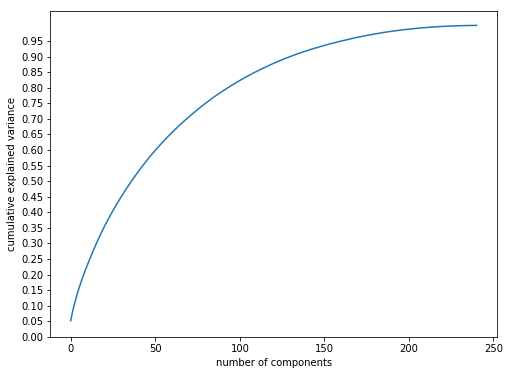

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

neigh_name = df['Neighborhood']
df_grouped_clustering = df.drop('Neighborhood', 1)

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(df_grouped_clustering)

pca = PCA().fit(data_rescaled)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0, 1.0, step=0.05))
# plt.xticks(np.arange(0, 450, step=30))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [57]:
pca = PCA(n_components=175)
dataset = pca.fit_transform(data_rescaled)

### Elbow Method to determine the number of clusters

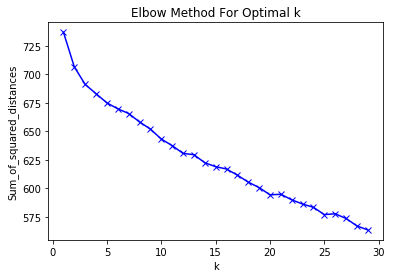

In [58]:
Sum_of_squared_distances = []
K = range(1, 30)
for kclusters in K:
    km = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10).fit(dataset)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette score method to determine the number of clusters

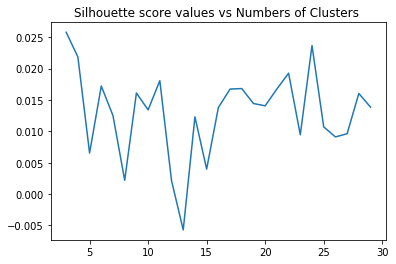

Optimal number of components is:
3


In [60]:
import sklearn

obs = dataset.copy() 
# obs = numpy.concatenate( (numpy.random.randn(100, 2) , 20 + numpy.random.randn(300, 2) , -15+numpy.random.randn(200, 2)))
silhouette_score_values=list()
 
NumberOfClusters=range(3,30)
 
for i in NumberOfClusters:
    
    classifier=KMeans(i,init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=10)
    classifier.fit(obs)
    labels= classifier.predict(obs)
#     print("Number Of Clusters:")
#     print(i)
#     print("Silhouette score value")
#     print(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', sample_size=None, random_state=None))
    silhouette_score_values.append(sklearn.metrics.silhouette_score(obs,labels ,metric='euclidean', random_state=0))
 
plt.plot(NumberOfClusters, silhouette_score_values)
plt.title("Silhouette score values vs Numbers of Clusters ")
plt.show()
 
Optimal_NumberOf_Components=NumberOfClusters[silhouette_score_values.index(max(silhouette_score_values))]
print("Optimal number of components is:")
print(Optimal_NumberOf_Components)

### Function to return top 5 venues

In [61]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [62]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = df['Neighborhood']

for ind in np.arange(df.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place    Chinese Restaurant   
1       Annadale           Pizza Place         Train Station   
2  Arden Heights           Pizza Place          Home Service   
3      Arlington              Bus Stop   American Restaurant   
4       Arrochar              Bus Stop          Liquor Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0        Cosmetics Shop         Deli / Bodega           Supermarket  
1          Dance Studio         Deli / Bodega            Restaurant  
2           Coffee Shop         Deli / Bodega              Bus Stop  
3         Deli / Bodega          Intersection           Yoga Studio  
4           Pizza Place         Deli / Bodega    Italian Restaurant

In [63]:
df_grouped_clustering = dataset.copy()
df_grouped_clustering

array([[-0.29702817,  0.09762305,  0.169836  , ..., -0.02285309,
        -0.00990747, -0.00048481],
       [-0.20809538,  0.00868041, -0.0198611 , ...,  0.00508093,
        -0.04984447,  0.01898395],
       [-0.29809652, -0.00973204,  0.04901528, ...,  0.03734391,
         0.05436065, -0.0589418 ],
       ...,
       [-0.20240904, -0.04390007,  0.03232571, ...,  0.00400954,
         0.09171204,  0.01715884],
       [-0.29598837, -0.02855633,  0.18629377, ...,  0.00882712,
         0.0049287 ,  0.01394618],
       [-0.21665595, -0.2101768 , -0.07444396, ..., -0.00195722,
        -0.05171638, -0.00237139]])

### Performing K-Means

In [64]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=2, copy_x=True).fit(df_grouped_clustering)

# check cluster labels generated for each row in the dataframe
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [65]:
df_grouped_with_cluster = df.copy()
df_grouped_with_cluster.insert(0, 'Cluster_Labels', kmeans.labels_)

In [66]:
df_grouped_with_cluster.head()

Cluster_Labels   Neighborhood  Accessories Store  Afghan Restaurant  \
0               4       Allerton                0.0                0.0   
1               2       Annadale                0.0                0.0   
2               0  Arden Heights                0.0                0.0   
3               0      Arlington                0.0                0.0   
4               0       Arrochar                0.0                0.0   

   American Restaurant  Antique Shop  Art Gallery  Arts & Crafts Store  \
0             0.000000           0.0          0.0                  0.0   
1             0.090909           0.0          0.0                  0.0   
2             0.000000           0.0          0.0                  0.0   
3             0.200000           0.0          0.0                  0.0   
4             0.000000           0.0          0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auto Garage  BBQ Joint  Baby Store  \
0               0.0            0.000000          0.0        0.0         0.0   
1               0.0            0.000000          0.0        0.0         0.0   
2               0.0            0.000000          0.0        0.0         0.0   
3               0.0            0.000000          0.0        0.0         0.0   
4               0.0            0.041667          0.0        0.0         0.0   

   Bagel Shop    Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0    0.000000  0.030303   0.0  0.0             0.0               0.0   
1    0.000000  0.000000   0.0  0.0             0.0               0.0   
2    0.000000  0.000000   0.0  0.0             0.0               0.0   
3    0.000000  0.000000   0.0  0.0             0.0               0.0   
4    0.083333  0.000000   0.0  0.0             0.0               0.0   

   Basketball Court  Beach  Bed & Breakfast  Beer Bar  Beer Store  Bike Shop  \
0               0.0    0.0              0.0       0.0         0.0        0.0   
1               0.0    0.0              0.0       0.0         0.0        0.0   
2               0.0    0.0              0.0       0.0         0.0        0.0   
3               0.0    0.0              0.0       0.0         0.0        0.0   
4               0.0    0.0              0.0       0.0         0.0        0.0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  \
0     0.0         0.0            0.0        0.0       0.0   
1     0.0         0.0            0.0        0.0       0.0   
2     0.0         0.0            0.0        0.0       0.0   
3     0.0         0.0            0.0        0.0       0.0   
4     0.0         0.0            0.0        0.0       0.0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0                   0.0        0.030303      0.0          0.0   
1                   0.0        0.000000      0.0          0.0   
2                   0.0        0.000000      0.0          0.0   
3                   0.0        0.000000      0.0          0.0   
4                   0.0        0.000000      0.0          0.0   

   Bubble Tea Shop  Building  Burger Joint  Burrito Place  Bus Line  \
0              0.0       0.0           0.0            0.0       0.0   
1              0.0       0.0           0.0            0.0       0.0   
2              0.0       0.0           0.0            0.0       0.0   
3              0.0       0.0           0.0            0.0       0.0   
4              0.0       0.0           0.0            0.0       0.0   

   Bus Station  Bus Stop  Butcher  Cafeteria  Café  Cajun / Creole Restaurant  \
0     0.030303  0.000000      0.0        0.0   0.0                        0.0   
1     0.000000  0.000000      0.0        0.0   0.0                        0.0   
2     0.000000  0.166667      0.0        0.0   0.0                        0.0   
3     0.000000  0.400000      0.0        0.0   0.0                        0.0   
4     0.000000  0.125000      0.0        0.0   0.0                        0.0   

   Camera Store  Candy Store  Caribbean Restaurant  

In [67]:
df_with_cluster_and_neighborhood = df_grouped_with_cluster[['Cluster_Labels', 'Neighborhood']]

### Appending New York data and Toronto data with respective cluster labels

In [69]:
NY_data = pd.read_excel(r'D:\ML\IBM Applied Data Science Capstone Project\NY_data.xlsx')
Toronto_data = pd.read_excel(r'D:\ML\IBM Applied Data Science Capstone Project\toronto_data.xlsx')
print('NY_data shape: ', NY_data.shape)
print('Toronto_data shape: ', Toronto_data.shape)

NY_data shape:  (306, 4)
Toronto_data shape:  (103, 5)


In [70]:
NY_data_merged = NY_data[['Neighborhood', 'Latitude', 'Longitude']]
NY_data_merged = NY_data_merged.merge(df_with_cluster_and_neighborhood, on = 'Neighborhood', how = 'left')

In [71]:
NY_data_merged.dropna(inplace = True)
NY_data_merged.head()

Neighborhood   Latitude  Longitude  Cluster_Labels
0    Wakefield  40.894705 -73.847201             2.0
1   Co-op City  40.874294 -73.829939             2.0
2  Eastchester  40.887556 -73.827806             0.0
3    Fieldston  40.895437 -73.905643             0.0
4    Riverdale  40.890834 -73.912585             0.0